In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd

# Absolute path to the CSV file
file_path = r'C:\Users\ACER\ML Projects\Notebooks\wafer_23012020_041211.csv'

# Reading the CSV file
wafers = pd.read_csv(file_path)

# Printing the shape and first few rows of the dataframe
print('Shape of the wafers:', wafers.shape)
print(wafers.head())


Shape of the wafers: (100, 592)
  Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0  Wafer-801   2968.33   2476.58  2216.7333  1748.0885    1.1127     100.0   
1  Wafer-802   2961.04   2506.43  2170.0666  1364.5157    1.5447     100.0   
2  Wafer-803   3072.03   2500.68  2205.7445  1363.1048    1.0518     100.0   
3  Wafer-804   3021.83   2419.83  2205.7445  1363.1048    1.0518     100.0   
4  Wafer-805   3006.95   2435.34  2189.8111  1084.6502    1.1993     100.0   

   Sensor-7  Sensor-8  Sensor-9  ...  Sensor-582  Sensor-583  Sensor-584  \
0   97.5822    0.1242    1.5300  ...         NaN      0.5004      0.0120   
1   96.7700    0.1230    1.3953  ...         NaN      0.4994      0.0115   
2  101.8644    0.1220    1.3896  ...         NaN      0.4987      0.0118   
3  101.8644    0.1220    1.4108  ...         NaN      0.4934      0.0123   
4  104.8856    0.1234    1.5094  ...         NaN      0.4987      0.0145   

   Sensor-585  Sensor-586  Sensor-587  Sen

In [7]:
wafers.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [8]:
#  if want to drop the column and make the test.csv
wafers.drop(columns=['Unnamed: 0','Good/Bad']).iloc[:100].to_csv('test.csv',index = False)

In [9]:
# replace the column "Unnamed: 0" as wafer
wafers.rename(columns={'Unnamed: 0':'wafer'},inplace=True)
print(wafers.head())


       wafer  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0  Wafer-801   2968.33   2476.58  2216.7333  1748.0885    1.1127     100.0   
1  Wafer-802   2961.04   2506.43  2170.0666  1364.5157    1.5447     100.0   
2  Wafer-803   3072.03   2500.68  2205.7445  1363.1048    1.0518     100.0   
3  Wafer-804   3021.83   2419.83  2205.7445  1363.1048    1.0518     100.0   
4  Wafer-805   3006.95   2435.34  2189.8111  1084.6502    1.1993     100.0   

   Sensor-7  Sensor-8  Sensor-9  ...  Sensor-582  Sensor-583  Sensor-584  \
0   97.5822    0.1242    1.5300  ...         NaN      0.5004      0.0120   
1   96.7700    0.1230    1.3953  ...         NaN      0.4994      0.0115   
2  101.8644    0.1220    1.3896  ...         NaN      0.4987      0.0118   
3  101.8644    0.1220    1.4108  ...         NaN      0.4934      0.0123   
4  104.8856    0.1234    1.5094  ...         NaN      0.4987      0.0145   

   Sensor-585  Sensor-586  Sensor-587  Sensor-588  Sensor-589  Sensor-590 

In [10]:
from sklearn.model_selection import train_test_split
wafer_train,wafer_test = train_test_split(wafers,test_size=0.20,random_state=1)

In [11]:
wafer_train.shape


(80, 592)

In [12]:
wafer_test.shape

(20, 592)

In [13]:
wafer_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 2 to 37
Columns: 592 entries, wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [14]:
wafer_train.describe()   # five 

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,24.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3018.179367,2485.438000,2203.850441,1467.149341,1.157808,100.0,97.788168,0.121983,1.461250,0.000180,...,74.066037,0.499695,0.013351,0.003491,2.672690,0.023699,0.014511,0.004593,74.998379,-0.875000
std,75.606092,70.207346,30.508302,467.630271,0.342553,0.0,5.383035,0.002004,0.071963,0.010392,...,31.597739,0.003433,0.004326,0.000856,0.871919,0.012208,0.007628,0.002508,54.620562,0.487177
min,2825.670000,2254.990000,2114.666700,988.207100,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,27.760100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2967.360000,2440.717500,2189.966700,1111.543600,0.837300,100.0,95.508900,0.120800,1.404550,-0.007375,...,48.307150,0.498025,0.011375,0.003100,2.282775,0.013375,0.007800,0.002500,32.694375,-1.000000
50%,3006.330000,2497.215000,2200.955600,1242.842000,1.138500,100.0,99.986700,0.122000,1.453700,0.001500,...,70.611050,0.499750,0.012650,0.003300,2.510200,0.021800,0.013500,0.003850,59.082500,-1.000000
75%,3071.540000,2527.525000,2213.511100,1963.801600,1.373725,100.0,101.512200,0.123200,1.507350,0.007650,...,101.658650,0.501675,0.014500,0.003800,2.892650,0.028100,0.019050,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.141500,100.0,107.142200,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [15]:
# looking at the categories in our target feature
wafer_train['Good/Bad'].value_counts()

Good/Bad
-1    75
 1     5
Name: count, dtype: int64

In [16]:
# Analyze the Missing Data


# check the missing vals in the target feature
wafer_train['Good/Bad'].isna().sum()

0

In [17]:
wafers.isna().sum().sum()

2306

C:\Users\ACER\AppData\Local\Temp\ipykernel_13292\3742688095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=wafer_train[col],color='indianred')
C:\Users\ACER\AppData\Local\Temp\ipykernel_13292\3742688095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=wafer_train[col],color='indianre

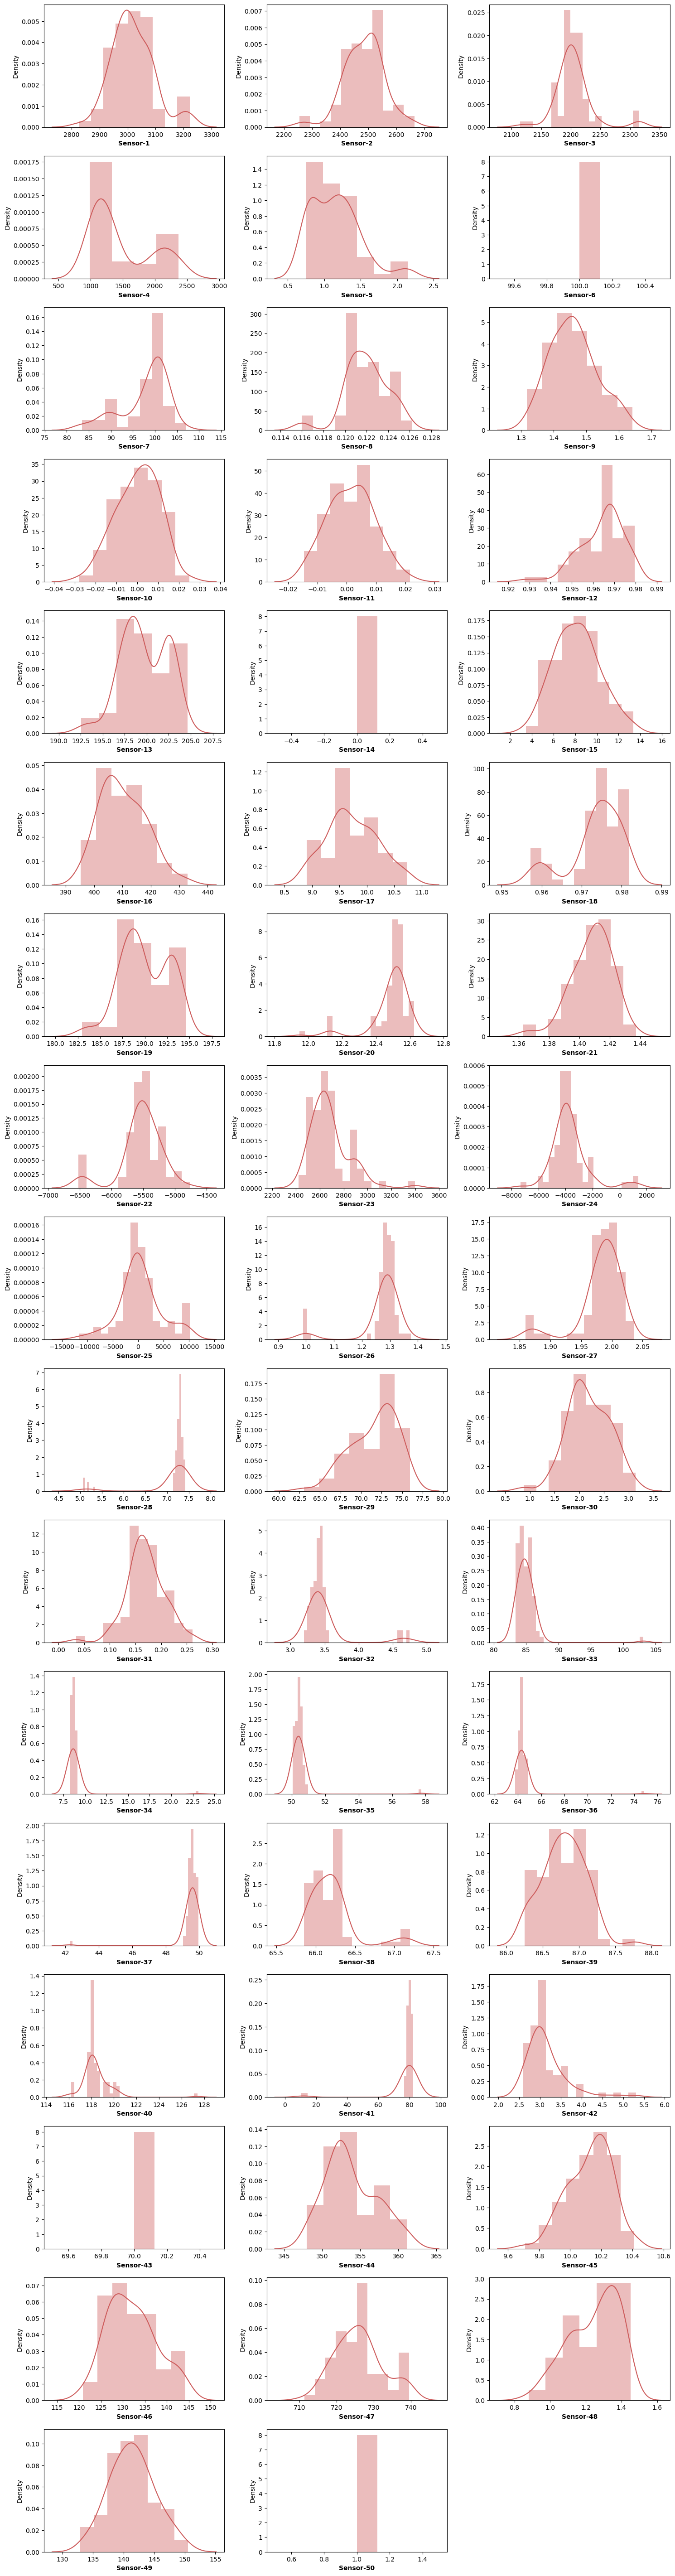

In [18]:
# lets have a look at the distribution first 50 sensors

plt.figure(figsize=(15,100))
for i,col in enumerate(wafer_train.columns[1:51]):
    plt.subplot(30,3,i+1)
    sns.distplot(x=wafer_train[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

C:\Users\ACER\AppData\Local\Temp\ipykernel_13292\190820659.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=wafer_train[col],color='indianred')
C:\Users\ACER\AppData\Local\Temp\ipykernel_13292\190820659.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=wafer_train[col],color='indianre

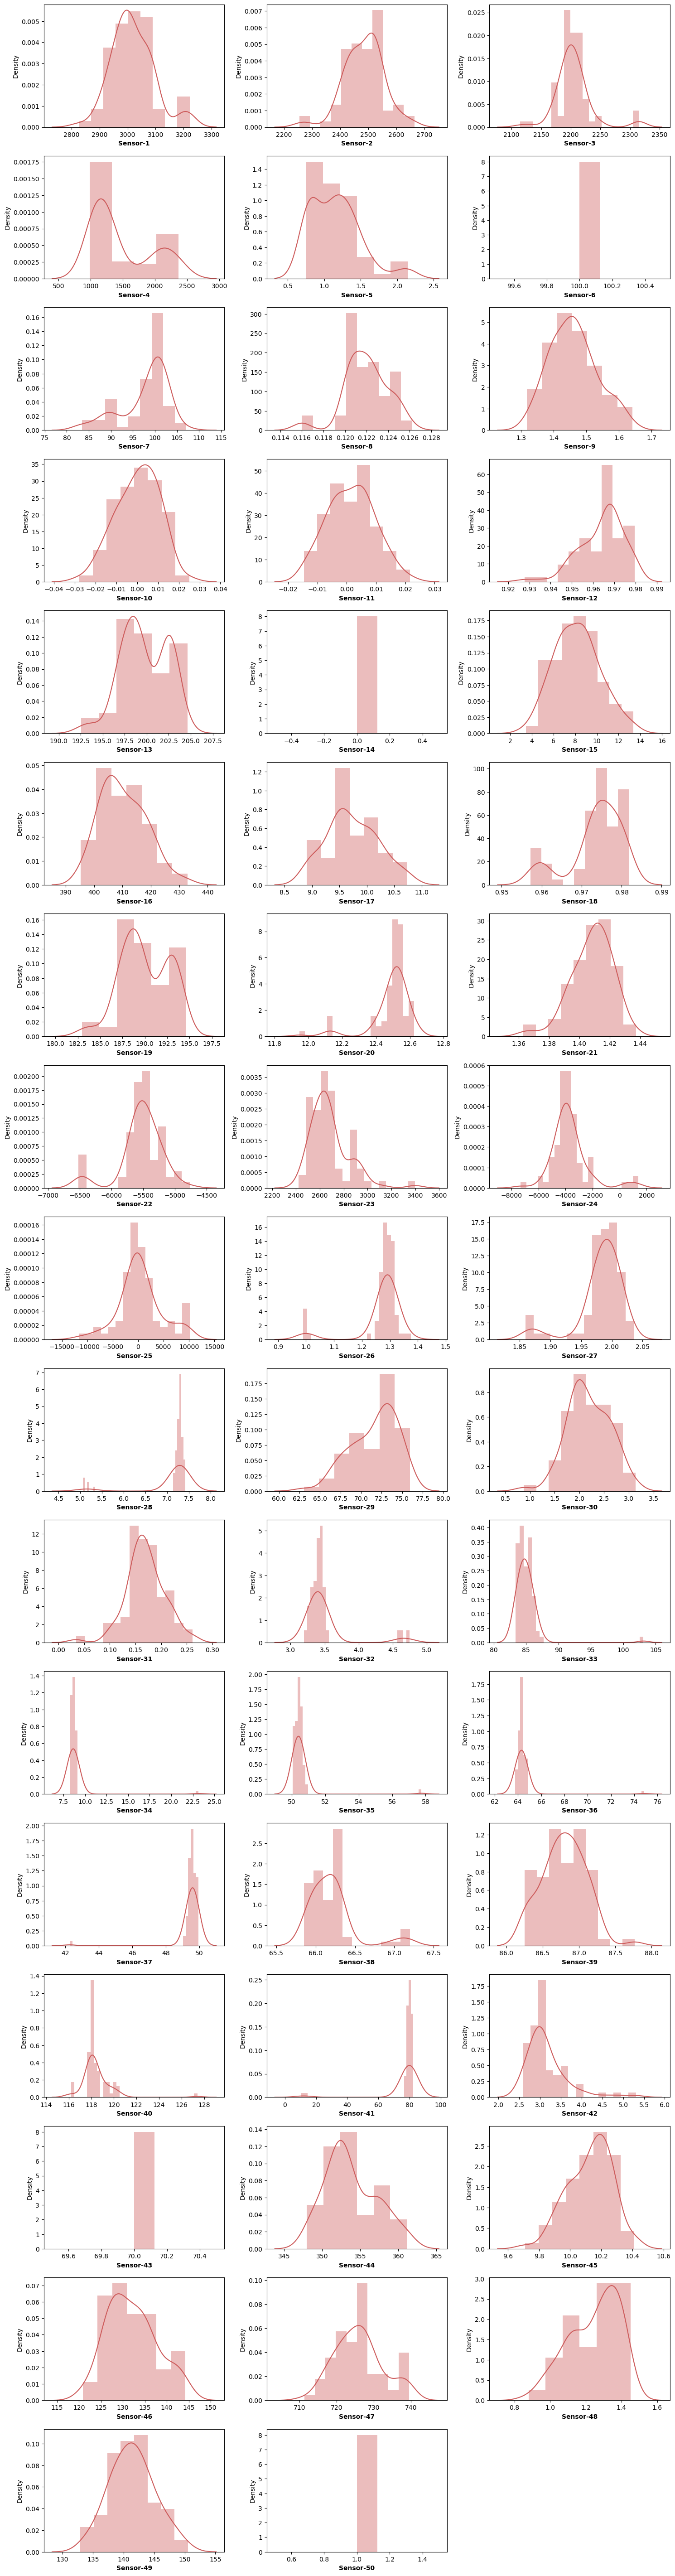

In [19]:
# select the random 50 sensors
random_50_sensor = []
for i in range(50):
    if i not in random_50_sensor:
        random_50_sensor.append(np.random.randint(1,591))

plt.figure(figsize=(15,100))
for i,col in enumerate(wafer_train.columns[1:51]):
    plt.subplot(30,3,i+1)
    sns.distplot(x=wafer_train[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [28]:
def get_col_with_zero_std_dev(df:pd.DataFrame):
    # Returning the list of columns name who are having zero standard deviation

    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O' ] # numerical only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redudant_cols(df:pd.DataFrame, missing_thresh = .7):
    # return a list of columns having missing values more than certain threshold

    cols_missing_ratio = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > missing_thresh].index)
    return cols_to_drop

In [29]:
# column w missing vals more than 70%
cols_to_drop1 = get_redudant_cols(wafer_train,missing_thresh=0.7)
cols_to_drop1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [30]:
# column having 0 standard deviation
cols_to_drop2 = get_col_with_zero_std_dev(df = wafer_train)
cols_to_drop2.append('wafer')
cols_to_drop2


['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [31]:
# cols to drop
cols_to_drop = cols_to_drop2 + cols_to_drop1

In [32]:
# seperate feature and labels out
x, y = wafer_train.drop(cols_to_drop,axis=1),wafer_train[["Good/Bad"]]

In [33]:
# Dependent feature variable
print('shape of the feature now:',x.shape)
x.head()

shape of the feature now: (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
73,2825.67,2286.09,2210.2778,2120.5760,1.0700,95.1089,0.1230,1.3947,0.0075,-0.0146,...,NaN,0.4974,0.0171,0.0049,3.4382,0.0218,0.0054,0.0020,24.6547,-1
97,3084.82,2387.42,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3603,-0.0031,0.0086,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
62,3001.95,2598.22,2213.2111,2070.7147,1.9705,87.7411,0.1232,1.5475,-0.0087,-0.0093,...,33.2533,0.4997,0.0177,0.0040,3.5433,0.0201,0.0067,0.0024,33.2533,-1
19,2893.07,2596.63,2214.2889,988.2071,1.2513,101.7044,0.1209,1.4612,-0.0052,-0.0130,...,47.2136,0.5025,0.0118,0.0033,2.3382,0.0364,0.0172,0.0063,47.2136,-1


In [34]:
# Independent /Target variable
print('shape of the label:',y.shape)
y.head()

shape of the label: (80, 1)


,Good/Bad
2,-1
73,-1
97,-1
62,-1
19,-1


In [35]:
# Data Transformation

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps = [('Imputer',imputer),('Scaler',RobustScaler())]
)
preprocessing_pipeline


Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [37]:
# Transform 'wafer_train' features
x_trans = preprocessing_pipeline.fit_transform(x)
print('shape of transformed feature set:',x_trans.shape)
x_trans

shape of transformed feature set: (80, 465)


array([[ 0.6320928 ,  0.03991591,  0.20269151, ...,  0.48529412,
        -0.3532362 ,  0.        ],
       [-1.74934751, -2.43210552,  0.39523411, ..., -0.54411765,
        -0.4807746 ,  0.        ],
       [ 0.7557274 , -1.26481007, -1.25177325, ..., -0.63235294,
        -0.39191848,  0.        ],
       ...,
       [-0.27133881,  0.72096305, -0.86715525, ..., -0.54411765,
        -0.4807746 ,  0.        ],
       [ 0.75563074, -0.59919938,  1.00684452, ...,  0.63235294,
         1.28629736,  0.        ],
       [-0.00299662, -0.84192034, -0.49339333, ...,  1.42647059,
         0.        ,  0.        ]])

In [38]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

x, y = x_trans[:, :-1], y

# Set n_neighbors to a smaller value
resampler = SMOTETomek(smote=SMOTE(k_neighbors=3), sampling_strategy='auto')

x_res, y_res = resampler.fit_resample(x, y)


In [44]:
print('Before resampling,shape of training instance:',np.c_[x,y].shape)
print('After resampling,shape of training instance:',np.c_[x_res,y_res].shape)

Before resampling,shape of training instance: (80, 465)
After resampling,shape of training instance: (150, 465)


In [45]:
# target cats after resampling
print(np.unique(y_res))
print(f'Value_counts:\n-1:{len(y_res[y_res == -1])},1:{len(y_res[y_res == 1])}')

[-1  1]
Value_counts:
-1:150,1:150


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.33,random_state=2)
print(f'train set:{x_train.shape, y_train.shape}')
print(f'test set:{x_test.shape, y_test.shape}')

train set:((100, 464), (100, 1))
test set:((50, 464), (50, 1))
